##### Double Pendulum
Programmer: Matthew Kusz 

Last Revision: 04/25/2019

We will be solving the equation of motion for a double pendulum using Hamilton's equations:

$\begin{align}
  \dot\phi &= \frac{\partial\mathcal{H}}{\partial p_\phi} \\
  \dot p_\phi &= -\frac{\partial\mathcal{H}}{\partial \phi}
  \;
\end{align}$

The form we will be using is $\mathcal{H} = T+U$, where

$\begin{align}
 T &= \frac{1}{2}(m_1+m_2) L_1^2 \dot \phi_1^2+m_2 L_1 L_2 \dot \phi_1 \dot \phi_2 \cos(\phi_1-\phi_2) 
 + \frac{1}{2} m_2 L_2^2 \dot \phi_2^2 \\
 U &= (m_1+m_2) g L_1 (1-\cos(\phi_1))+m_2 g L_2(1-\cos(\phi_2))
\end{align}$

Solving Hamilton's equations we get:

$\begin{align}
  \dot\phi_1 &= \frac{\partial\mathcal{H}}{\partial p_{\phi_1}} = \frac{p_{\phi_1} m_2L_2^2-p_{\phi_2} m_2 L_1 L_2 
  \cos(\phi_1-\phi_2)}{m_2 L_1^2 L_2^2 (-m_2 \cos^2(\phi_1-\phi_2)+(m_1+m_2))} \\
  \dot p_{\phi_1} &= -\frac{\partial\mathcal{H}}{\partial \phi_1} = \frac{-(-L_1 (m_1+m_2) 
  p_{\phi_2} + L_2 m_2 p_{\phi_1} \cos(\phi_1-\phi_2)) (-L_2 p_{\phi_1}+L_1 p_{\phi_2} 
  \cos(\phi_1-\phi_2)) \sin(\phi_1-\phi_2)}{L_1^2 L_2^2 (m_1+m_2 \sin^2(\phi_1-\phi_2))^2} - (m_1+m_2) g L_1 \sin(\phi_1)
\end{align}$

$\begin{align}
  \dot\phi_2 &= \frac{\partial\mathcal{H}}{\partial p_{\phi_2}} = \frac{L_1^2 (m_1+m_2) p_{\phi_2}-p_{\phi_1} m_2 L_1 L_2 
  \cos(\phi_1-\phi_2)}{m_2 L_1^2 L_2^2 (-m_2 \cos^2(\phi_1-\phi_2)+(m_1+m_2))} \\
  \dot p_{\phi_2} &= -\frac{\partial\mathcal{H}}{\partial \phi_2} = \frac{-(-L_1 (m_1+m_2) 
  p_{\phi_2} + L_2 m_2 p_{\phi_1} \cos(\phi_1-\phi_2)) (L_2 p_{\phi_1}-L_1 p_{\phi_2} 
  \cos(\phi_1-\phi_2)) \sin(\phi_1-\phi_2)}{L_1^2 L_2^2 (m_1+m_2 \sin^2(\phi_1-\phi_2))^2} - m_2 g L_2 \sin(\phi_2)
\end{align}$

We can now use our ode solver to find 
$[\phi_1, p_{\phi_1}, \phi_2, p_{\phi_2}]$
 and plot the motion we get from our double pendulum.

In [12]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

In [13]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    m1 : float
        mass of the first pendulum
    m2 : float
        mass of the second pendulum
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum 
    g : float
        gravity 

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, m1, m2, L1, L2, g):
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.g = g
        
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [phi1_dot, p_phi1_dot, phi2_dot, p_phi2_dot]
        
        Parameters
        ----------
        y : float
            A 4-component vector with y[0] = phi1(t), y[1] = p_phi1,
            y[2] = phi2(t) and y[3] = p_phi2
        t : float
            time 
            
        Returns
        -------
        [phi1_dot, p_phi1_dot, phi2_dot, p_phi2_dot]
        """

        phi1_dot = (y[1]*self.m2*self.L2**2-y[3]*self.m2*self.L1*self.L2*np.cos(y[0]-y[2])) \
                     / ((self.m2*self.L1**2*self.L2**2)*(self.m1+self.m2-self.m2*np.cos(y[0]-y[2])**2))
        
        phi2_dot = (self.L1**2*(self.m1+self.m2)*y[3]-self.m2*self.L1*self.L2*np.cos(y[0]-y[2])*y[1]) \
                     / ((self.m2*self.L1**2*self.L2**2)*(self.m1+self.m2-self.m2*np.cos(y[0]-y[2])**2))
        
        p_phi1_dot = -(-self.L1*(self.m1+self.m2)*y[3]+self.L2*self.m2*y[1]*np.cos(y[0]-y[2])) * \
                     (-self.L2*y[1]+self.L1*y[3]*np.cos(y[0]-y[2]))*np.sin(y[0]-y[2]) / \
                     (self.L1**2*self.L2**2*(self.m1+self.m2*np.sin(y[0]-y[2])**2)**2) - \
                     (self.m1+self.m2)*self.g*self.L1*np.sin(y[0])
        
        p_phi2_dot = -(-self.L1*(self.m1+self.m2)*y[3]+self.L2*self.m2*y[1]*np.cos(y[0]-y[2])) * \
                     (self.L2*y[1]-self.L1*y[3]*np.cos(y[0]-y[2]))*np.sin(y[0]-y[2]) / \
                     (self.L1**2*self.L2**2*(self.m1+self.m2*np.sin(y[0]-y[2])**2)**2) - \
                     self.m2*self.g*self.L2*np.sin(y[2])
                          
        
        return [phi1_dot, p_phi1_dot, phi2_dot, p_phi2_dot]
        
    def solve_ode(self, phi1_0, p_phi1_0, phi2_0, p_phi2_0,
                  t, abserr = 1.0e-12, relerr=1.0e-12):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        
        y = [phi1_0, p_phi1_0, phi2_0, p_phi2_0]
        
        solution = solve_ivp(self.dy_dt, (t[0], t[-1]), y, t_eval=t, rtol=relerr, atol=abserr)
            # solve_ivp( function for rhs with (t, v) argument (cf. (v,t) for odeint), 
            #            tspan=(starting t value, ending t value),
            #            initial value of v(t), array of points we want to know v(t),
            #            method='RK45' is the default method,
            #            rtol=1.e-3, atol=1.e-6 are default tolerances
            #          )
            
        phi1, p_phi1, phi2, p_phi2 = solution.y
        
        return phi1, p_phi1, phi2, p_phi2        
    

In [14]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [15]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [16]:
# Initial conditions
m1 = 1.
m2 = 1.
L1 = 1.
L2 = 1.
g = 1.

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 150.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t) 

# Instantiate a pendulum
p1 = Pendulum(m1=m1, m2=m2, L1=L1, L2=L2, g=g)

In [17]:
phi1_0 = 0.0
p_phi1_0 = 0.
phi2_0 = 0.05
p_phi2_0 = 0.

# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\phi(t)$')

# find out points for both masses
phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)

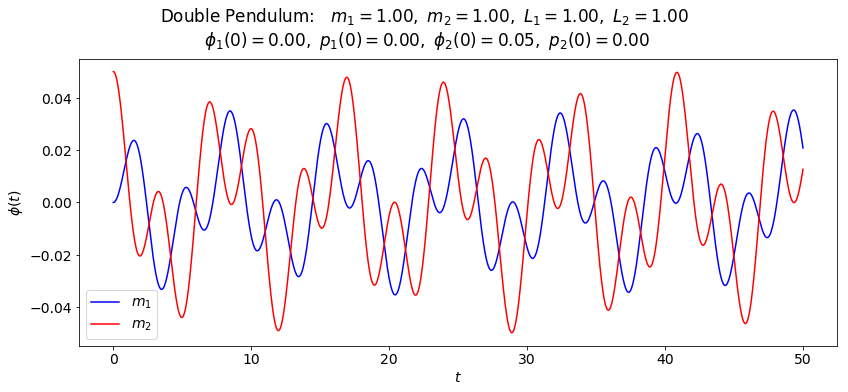

In [18]:
# start the plot!
fig = plt.figure(figsize=(12,5))
overall_title = 'Double Pendulum:  ' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f}$' + \
                '\n' +\
                rf' $\phi_1(0) = {phi1_0:.2f},$' + \
                rf' $p_1(0) = {p_phi1_0:.2f},$' + \
                rf' $\phi_2(0) = {phi2_0:.2f},$' + \
                rf' $p_2(0) = {p_phi2_0:.2f}$'
fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 50.)    
plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label= '$m_1$', 
            title=None,
            ax=ax_a)                 

start, stop = start_stop_indices(t_pts, 0., 50.)    
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label='$m_2$', 
            title=None, 
            ax=ax_a)

fig.tight_layout()
fig.savefig('Double_Pendulum.png', dpi = 200, bbox_inches='tight')  # always bbox_inches='tight'

# Showing Chaos
Let's check if our system becomes chaotic once we are beyond the small angle approximation.

In [19]:
# Labels for individual plot axes
log_phi_vs_time_labels = (r'$t$', r'$log|\Delta\phi(t)|$')

# initial conditions specified
# first pendulum
phi1_0 = 0.1
p_phi1_0 = 0.
phi2_0 = 0.1
p_phi2_0 = 0.
phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)

# second pendulum
phi1_0_2 = 0.101
p_phi1_0_2 = 0.
phi2_0_2 = 0.101
p_phi2_0_2 = 0.
phi1_2, p_phi1_2, phi2_2, p_phi2_2 = p1.solve_ode(phi1_0_2, p_phi1_0_2, phi2_0_2,
                                                  p_phi2_0_2, t_pts)

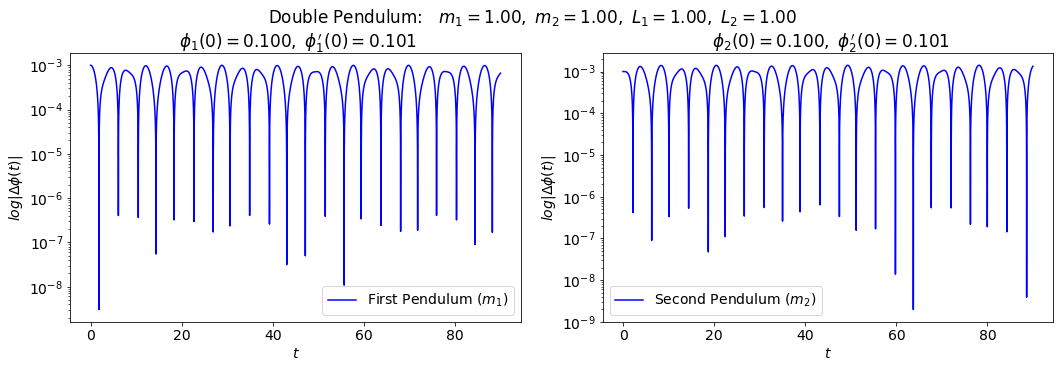

In [20]:
# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi1_2 - phi1)
Delta_phi2 = np.fabs(phi2_2 - phi2)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum:  ' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f}$'
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='First Pendulum $(m_1)$', 
            title=rf' $\phi_1(0) = {phi1_0:.3f},$' + \
                  rf' $\phi_1^\prime(0) = {phi1_0_2:.3f}$', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=7   
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi2[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='Second Pendulum $(m_2)$', 
            title=rf' $\phi_2(0) = {phi2_0:.3f},$' + \
                  rf' $\phi_2^\prime(0) = {phi2_0_2:.3f}$', 
            ax=ax_b)   
  
fig.tight_layout()
fig.savefig('Double_Pendulum_Periodic.png', dpi = 200, bbox_inches='tight')  # always bbox_inches='tight'

We see our system is periodic since the difference between the two systems does not change.

Now to look at when we are beyond the small angle approximation.

In [21]:
# Labels for individual plot axes
log_phi_vs_time_labels = (r'$t$', r'$log|\Delta\phi(t)|$')

# initial conditions specified
phi1_0 = 1.2
p_phi1_0 = 0.
phi2_0 = 1.2
p_phi2_0 = 0.
phi1, p_phi1, phi2, p_phi2 = p1.solve_ode(phi1_0, p_phi1_0, phi2_0, p_phi2_0, t_pts)
phi1_0_2 = 1.201
p_phi1_0_2 = 0.
phi2_0_2 = 1.201
p_phi2_0_2 = 0.
phi1_2, p_phi1_2, phi2_2, p_phi2_2 = p1.solve_ode(phi1_0_2, p_phi1_0_2, phi2_0_2,
                                                  p_phi2_0_2, t_pts)

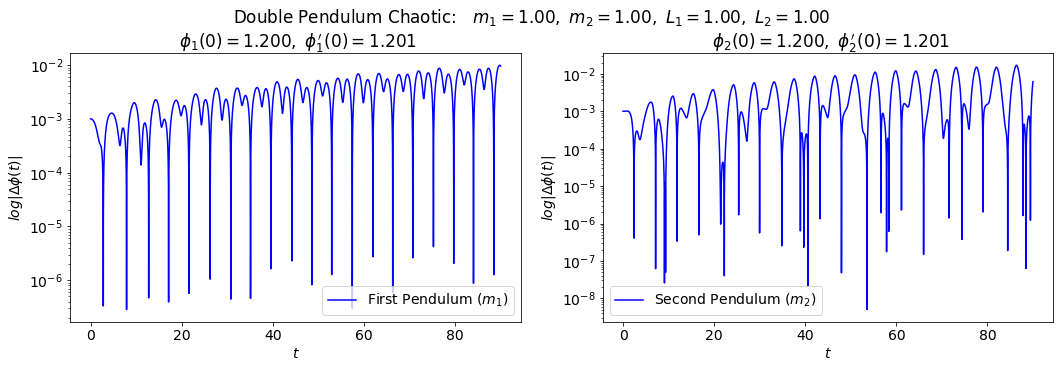

In [22]:
# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi1_2 - phi1)
Delta_phi2 = np.fabs(phi2_2 - phi2)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double Pendulum Chaotic:  ' + \
                rf' $m_1 = {m1:.2f},$' + \
                rf' $m_2 = {m2:.2f},$' + \
                rf' $L_1 = {L1:.2f},$' + \
                rf' $L_2 = {L2:.2f}$'
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=10   
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='First Pendulum $(m_1)$', 
            title=rf' $\phi_1(0) = {phi1_0:.3f},$' + \
                  rf' $\phi_1^\prime(0) = {phi1_0_2:.3f}$', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=7   
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, 0, 90)    
plot_y_vs_x(t_pts[start : stop], Delta_phi2[start : stop], 
            axis_labels=log_phi_vs_time_labels, 
            color='blue',
            semilogy = True,
            label='Second Pendulum $(m_2)$', 
            title=rf' $\phi_2(0) = {phi2_0:.3f},$' + \
                  rf' $\phi_2^\prime(0) = {phi2_0_2:.3f}$',
            ax=ax_b)   
  
fig.tight_layout()
fig.savefig('Double_Pendulum_Chaotic.png', dpi = 200, bbox_inches='tight')  # always bbox_inches='tight'

We see the difference between the two systems is increasing, which tells us the system is chaotic.